# CCFDetector: Using ML against Credit Card Frauds

L'obiettivo di questo progetto, realizzato per l'esame di Fondamenti di Intelligenza Artificiale presso l'Univeristà degli Studi di Salerno, è quello di realizzare un sistema di Machine Learning per l'individuazione di transazioni fraudolente relative ai pagamenti elettronici, cioè tutte quelle transazioni effettuate da carte di credito senza l'autorizzazione dei possessori .
## Setup del progetto e Data Understanding
---
### Inizio ad importare le librerie necessarie

In [1]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec
import plotly.express as px

### Caricamento del dataset
Il dataset contiene più di 20 milioni di righe, dunque, per motivi legati alla capacità dell'hardware, ne andrò a selezionare 300.000.

In [2]:
df = pd.read_csv('credit_card_transactions-ibm_v2.csv').sample(n=300000, random_state=42)
df.head(10)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,No
9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No
536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,No
13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,No
17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,No
792843,55,3,2006,6,10,09:15,$1.36,Swipe Transaction,-6571010470072147219,Rego Park,NY,11374.0,5499,NaN,No
8966297,776,0,2007,2,25,22:31,$97.81,Swipe Transaction,-6974082828836151610,Milwaukee,WI,53224.0,4900,NaN,No
895801,66,0,2007,8,21,13:02,$23.25,Swipe Transaction,3675785629314646441,Gonzales,TX,78629.0,7349,NaN,No
22902727,1880,2,2010,12,31,01:06,$486.70,Swipe Transaction,-3398248499422470718,Atlantic City,NJ,8401.0,7995,NaN,No
5845532,490,5,2015,11,28,13:45,$92.67,Chip Transaction,4722913068560264812,Pompano Beach,FL,33063.0,5411,NaN,No


In [3]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,No
9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No
536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,No
13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,No
17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8197082,693,5,2015,11,12,14:44,$97.53,Chip Transaction,-5876916225207329881,Wilton,CT,6897.0,7230,Insufficient Balance,No
23307708,1903,3,2009,1,27,09:33,$1.87,Swipe Transaction,-6571010470072147219,Richmond,CA,94804.0,5499,NaN,No
3421521,287,1,2015,9,13,12:35,$6.64,Chip Transaction,8149422946776550490,Cancun,Mexico,NaN,5411,NaN,No
12718365,1043,1,2012,4,18,09:59,$0.42,Swipe Transaction,-8798331441203866966,Lakewood,NJ,8701.0,5411,NaN,No


In [4]:
# Controllo che siano state importate anche transazioni fraudolente
df[df['Is Fraud?'] == 'Yes'].shape

(388, 15)

In [5]:
# Per demo
# df['MCC'].unique()

### Descrizione del dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 18199893 to 18106096
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User            300000 non-null  int64  
 1   Card            300000 non-null  int64  
 2   Year            300000 non-null  int64  
 3   Month           300000 non-null  int64  
 4   Day             300000 non-null  int64  
 5   Time            300000 non-null  object 
 6   Amount          300000 non-null  object 
 7   Use Chip        300000 non-null  object 
 8   Merchant Name   300000 non-null  int64  
 9   Merchant City   300000 non-null  object 
 10  Merchant State  266377 non-null  object 
 11  Zip             264443 non-null  float64
 12  MCC             300000 non-null  int64  
 13  Errors?         4778 non-null    object 
 14  Is Fraud?       300000 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 36.6+ MB


Come si può osservare, le caratteristiche *Merchant State*, *Zip* ed *Errors?* contengono dei valori nulli. Vado a generare un istogramma per la visualizzazione della percentuale di valori nulli per ciascun attributo. 

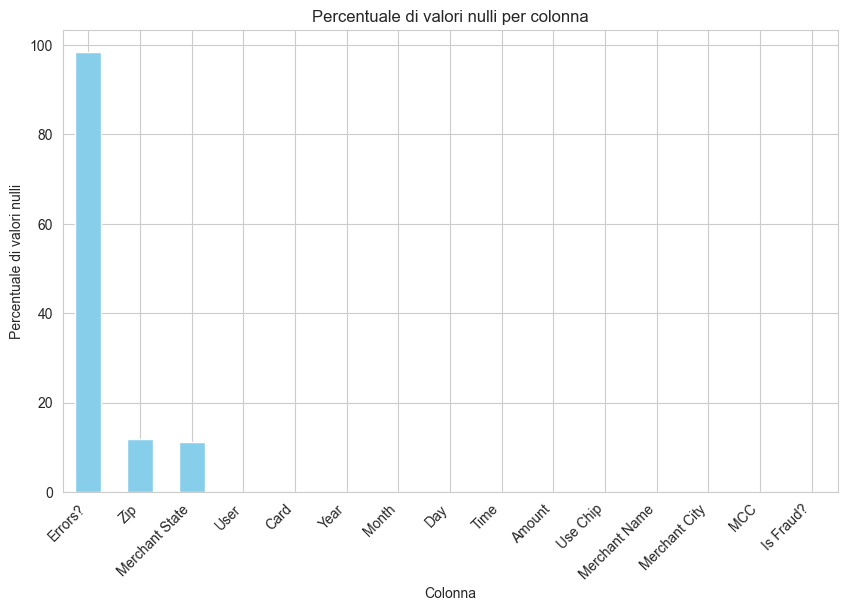

In [7]:
# Calcolo percentuale di valori nulli per ogni colonna
percent_missing = (df.isnull().sum() / len(df)) * 100

# Ordino in ordine decrescente di percentuale
sorted_columns = percent_missing.sort_values(ascending=False)

# Creo un istogramma
plt.figure(figsize=(10, 6))
sorted_columns.plot(kind='bar', color='skyblue')
plt.title('Percentuale di valori nulli per colonna')
plt.xlabel('Colonna')
plt.ylabel('Percentuale di valori nulli')
plt.xticks(rotation=45, ha='right')
plt.show()

La variabile target, dunque quella che il modello dovrà predire, è rappresentata dalla colonna **Is Fraud?**, contenente valori non interi. Dunque, prima di proseguire, per questioni di praticità, vado a creare una nuova colonna chiamata **Fraud**, nella quale mapperò i valori della colonna originale che hanno valore 'Yes' a 1 e quelli che hanno valore 'No' a 0. Infine, rimuovo la colonna originale.

In [8]:
# Creo una nuova colonna 'Fraud' e le assegno i valori di 'Is Fraud?' convertiti in 0 e 1
df['Fraud'] = df['Is Fraud?'].map({'Yes': 1, 'No': 0})

# Elimina la colonna 'Is Fraud?'
df.drop(['Is Fraud?'], axis=1, inplace=True)
df.head(10)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Fraud
18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,0
9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,0
536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,0
13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,0
17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,0
792843,55,3,2006,6,10,09:15,$1.36,Swipe Transaction,-6571010470072147219,Rego Park,NY,11374.0,5499,NaN,0
8966297,776,0,2007,2,25,22:31,$97.81,Swipe Transaction,-6974082828836151610,Milwaukee,WI,53224.0,4900,NaN,0
895801,66,0,2007,8,21,13:02,$23.25,Swipe Transaction,3675785629314646441,Gonzales,TX,78629.0,7349,NaN,0
22902727,1880,2,2010,12,31,01:06,$486.70,Swipe Transaction,-3398248499422470718,Atlantic City,NJ,8401.0,7995,NaN,0
5845532,490,5,2015,11,28,13:45,$92.67,Chip Transaction,4722913068560264812,Pompano Beach,FL,33063.0,5411,NaN,0


Continuo a studiare i valori contenuti nelle varie caratteristiche per ottenere una maggiore comprensione dei dati.
**Feature *Errors?*:**

In [9]:
df["Errors?"].unique()

array([nan, 'Bad PIN', 'Insufficient Balance', 'Technical Glitch',
       'Bad Card Number', 'Bad CVV', 'Bad Expiration', 'Bad Zipcode',
       'Insufficient Balance,Technical Glitch', 'Bad Card Number,Bad CVV',
       'Bad CVV,Insufficient Balance',
       'Bad Card Number,Insufficient Balance', 'Bad PIN,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad Card Number,Bad Expiration',
       'Bad Expiration,Bad CVV', 'Bad Expiration,Insufficient Balance'],
      dtype=object)

Questa colonna, a differenza di quanto mi aspettassi dal titolo, non riporta semplicemente se sono avvenuti errori o meno nella transazione, ma ne riporta anche la tipologia di errore.
**Feature *Use Chip*:**

In [10]:
df["Use Chip"].unique()

array(['Chip Transaction', 'Online Transaction', 'Swipe Transaction'],
      dtype=object)

Questa colonna risulta riportare la modalita' con cui è avvenuta una transazione, che può essere:
- Transazione con chip (carta inserita nel lettore del terminale POS)
- Transazione online (acquisto online  &rarr; dati della carta inseriti manualmente in un form)
- Transazione senza chip (carta letta attraverso banda magnetica)  &rarr; meno sicura rispetto al chip, in quanto questo richiede un PIN per validare la transazione

Continuo l'esplorazione dei dati cercando di comprendere eventuali pattern relativi alle frodi.
### Importo delle transazioni
Innanzitutto, ho bisogno di convertire i valori di *Amount* in valori numerici, non prima di aver rimosso il simbolo della valuta che precede le cifre:

In [11]:
# Rimuovo simbolo del dollaro e converto i valori di Amount in float
df["Amount"] = df["Amount"].str.replace("$", "").astype(float)

C:\Users\Marco\AppData\Local\Temp\ipykernel_14212\2749713065.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Amount"] = df["Amount"].str.replace("$", "").astype(float)


Prima di estrapolare il dataframe con le sole transazioni fraudolente, siccome non posso convertire Time in un intero, decido di scomporlo in ora e minuto:

In [12]:
# Divido Time in Hour e Minute
df["Hour"] = df["Time"].str[0:2] # Prendo prime due cifre
df["Minute"] = df["Time"].str[3:5] # Prendo ultime due cifre
df.drop(['Time'], axis=1, inplace=True)

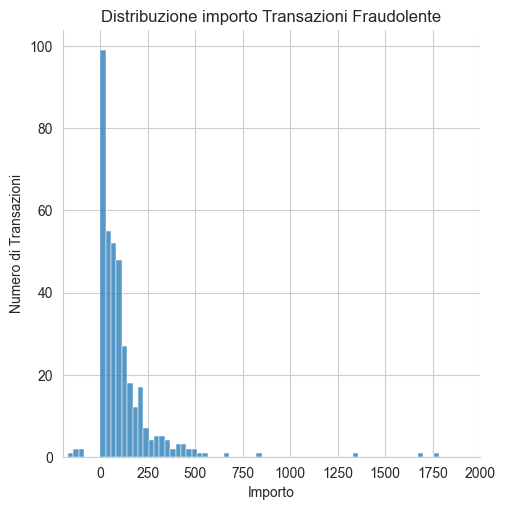

In [13]:
df_fraud = df[df['Fraud'] == 1] # Creo dataset con sole transazioni fraudolente
sns.displot(df_fraud['Amount'].astype(float), kde=False, bins=80)
plt.title('Distribuzione importo Transazioni Fraudolente')
plt.xlabel('Importo')
plt.ylabel('Numero di Transazioni')
plt.xlim(-200, 2000)
plt.show()

Osservo che la maggior parte delle transazioni fraudolente hanno un importo compreso nell'intervallo [0, 250], dunque, generalmente, cifre relativamente basse.

### MCC - Merchant Category Code
Questa informazione potrebbe essere rilevante per i fini della predizione di transazioni fraudolente poiché potrebbero esserci delle categorie di attivita' piu' soggette a frodi.

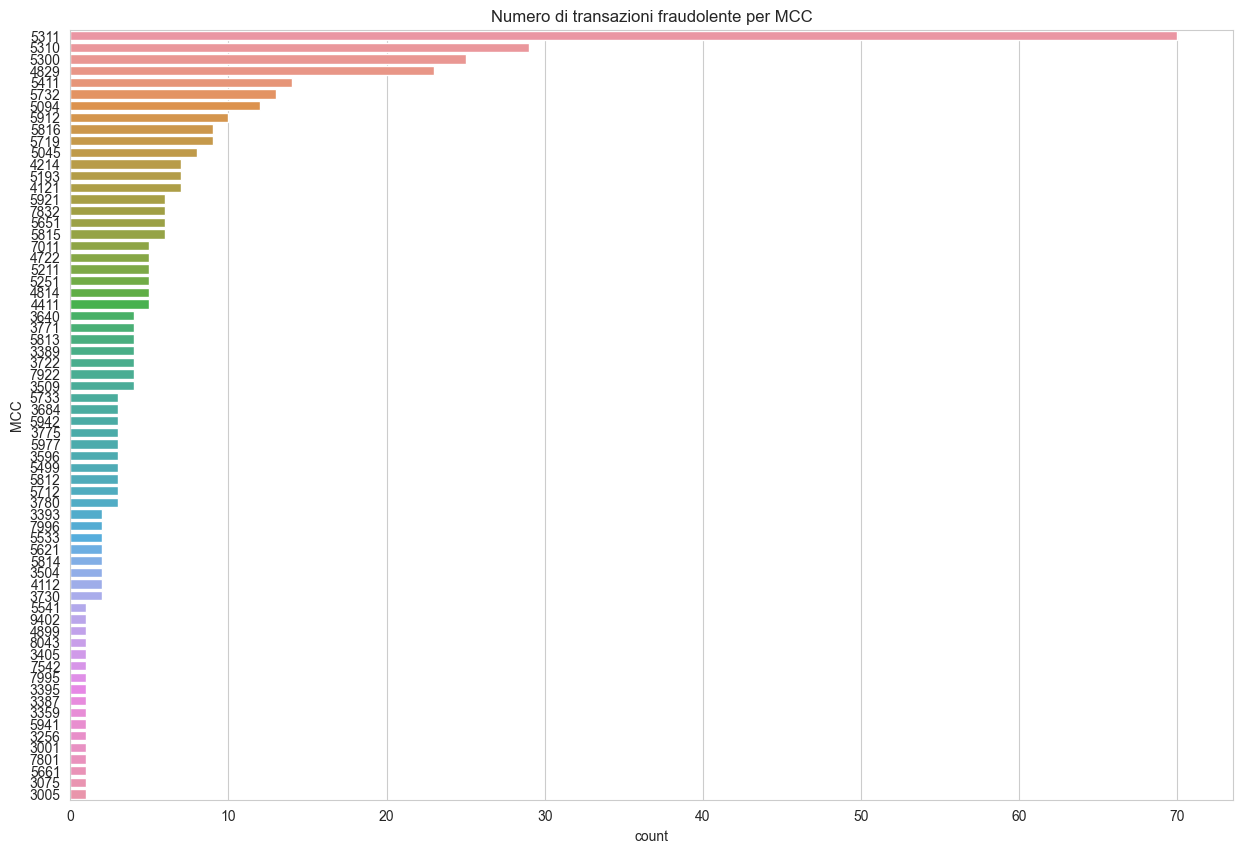

In [14]:
plt.figure(figsize=(15, 10))  
sns.countplot(data=df_fraud, y='MCC', order=df_fraud['MCC'].value_counts().index)
plt.title('Numero di transazioni fraudolente per MCC')
plt.show()

Effettivamente, sembrano esserci categorie piu' soggette a frodi rispetto ad altre.

### Distribuzione Geografica
**Nazioni**

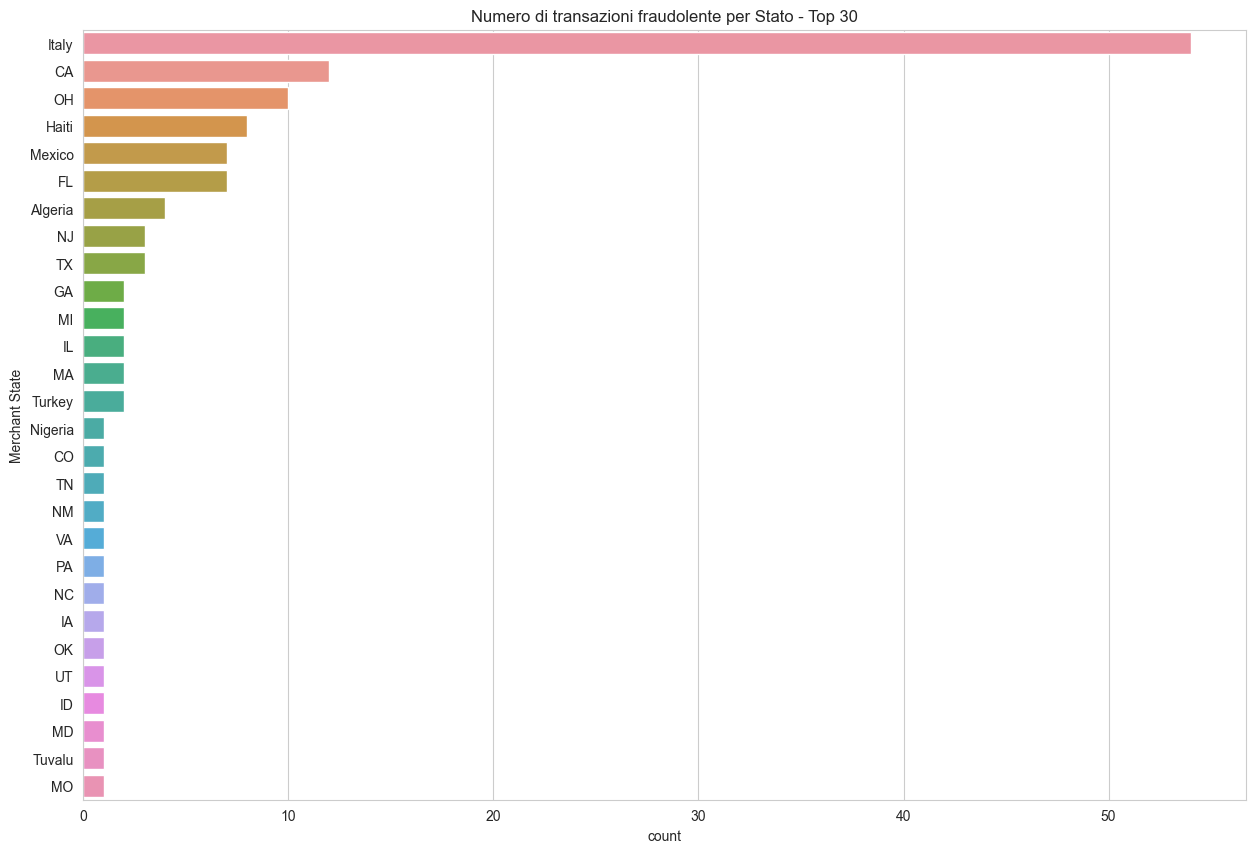

In [15]:
plt.figure(figsize=(15, 10))  
sns.countplot(data=df_fraud, y='Merchant State', order=df_fraud['Merchant State'].value_counts().index)
plt.title('Numero di transazioni fraudolente per Stato - Top 30')
plt.show()

I paesi maggiormente interessati da transazioni fraudolente sono Italia, California, Ohio, Haiti, Messico, Florida, Algeria, New Jersey e Texas. Dunque, negli States è un fenomeno molto comune.
**Città**

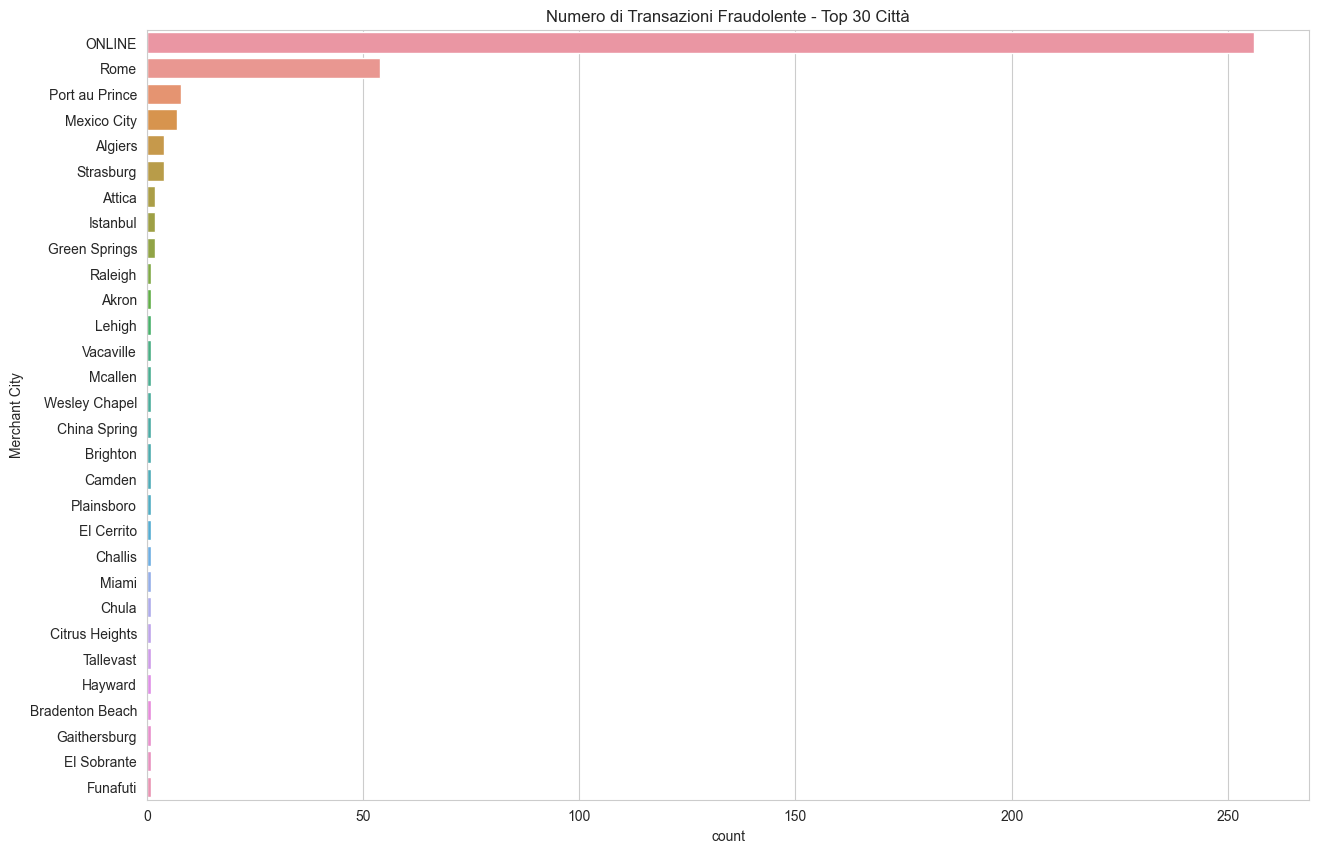

In [16]:
plt.figure(figsize=(15, 10))
top_cities = df_fraud['Merchant City'].value_counts().head(30).index
sns.countplot(data=df_fraud, y='Merchant City', order=top_cities)
plt.title('Numero di Transazioni Fraudolente - Top 30 Città')
plt.show()

Si nota che la maggior parte delle transazioni fraudolente avvengono online.

### Variazione Temporale
**Per Anno**

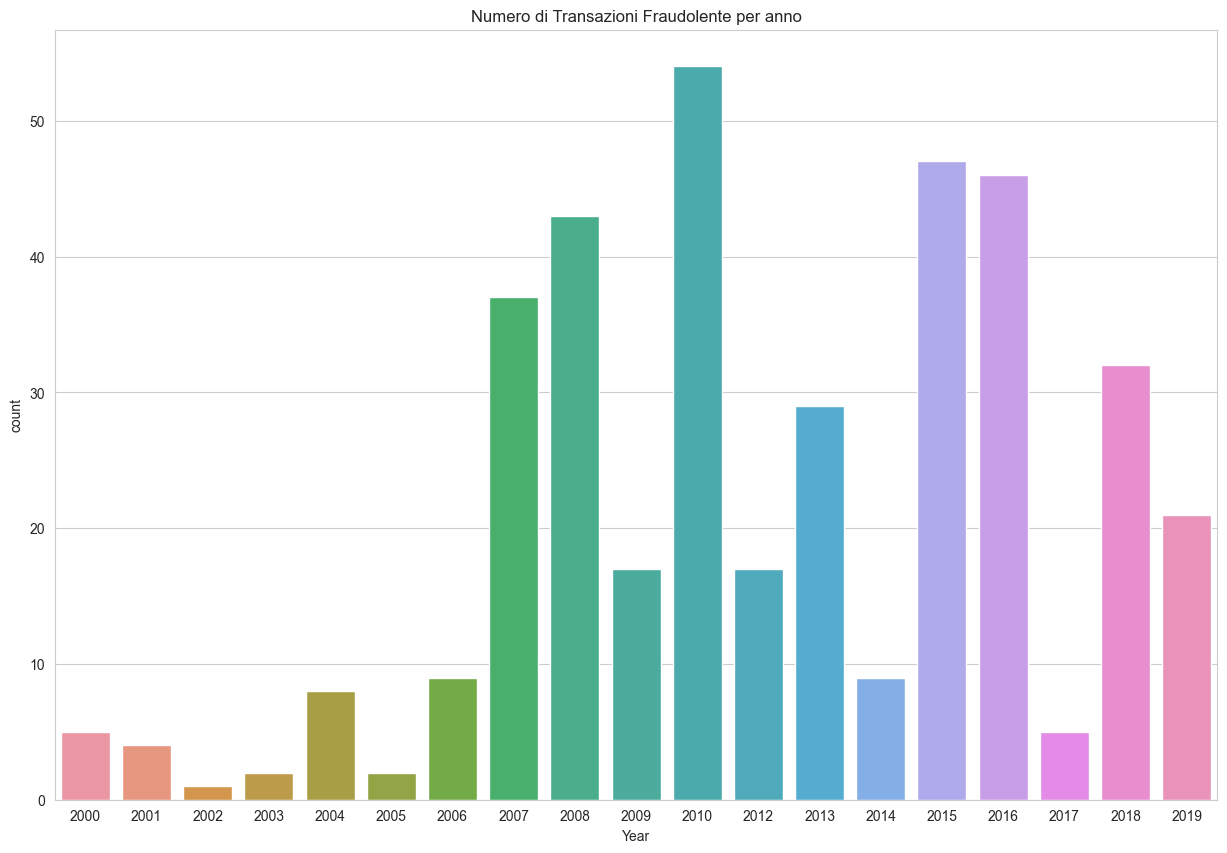

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_fraud, x='Year')
plt.title('Numero di Transazioni Fraudolente per anno')
plt.show()

Dal 2006 al 2008, il numero di transazioni fraudolente è andato notevolmente crescendo, raggiungendo, poi, il picco nel 2010.
Il fatto che negli ultimi anni tale valore abbia iniziato a decrescere, puo' indicare un aumento dei controlli e delle misure di sicurezza relative ai pagamenti elettronici.
**Per Mese**

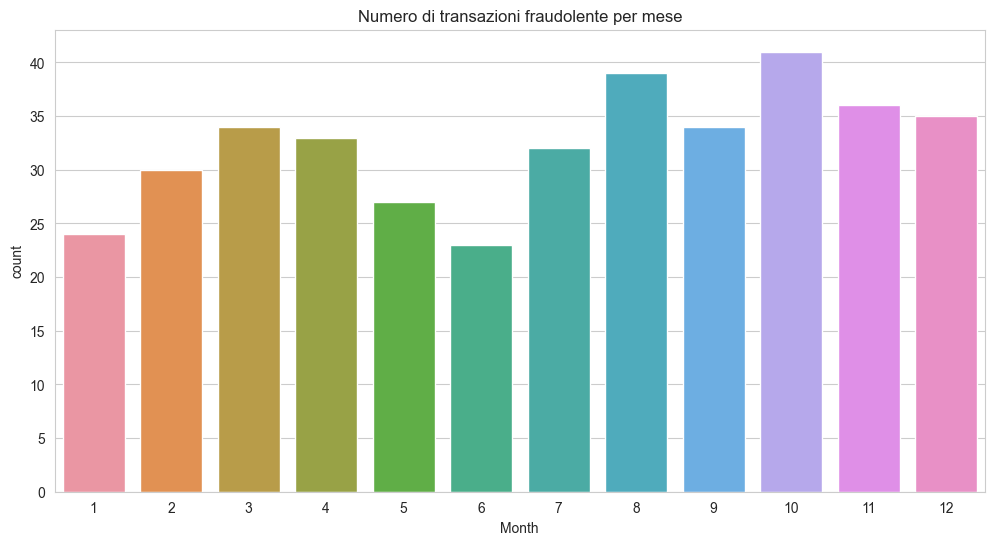

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_fraud, x='Month')
plt.title('Numero di transazioni fraudolente per mese')
plt.show()

In questo caso, non ci sono particolari variazioni, tuttavia, le frodi aumentano verso la fine dell'anno.
**Per giorno del mese**

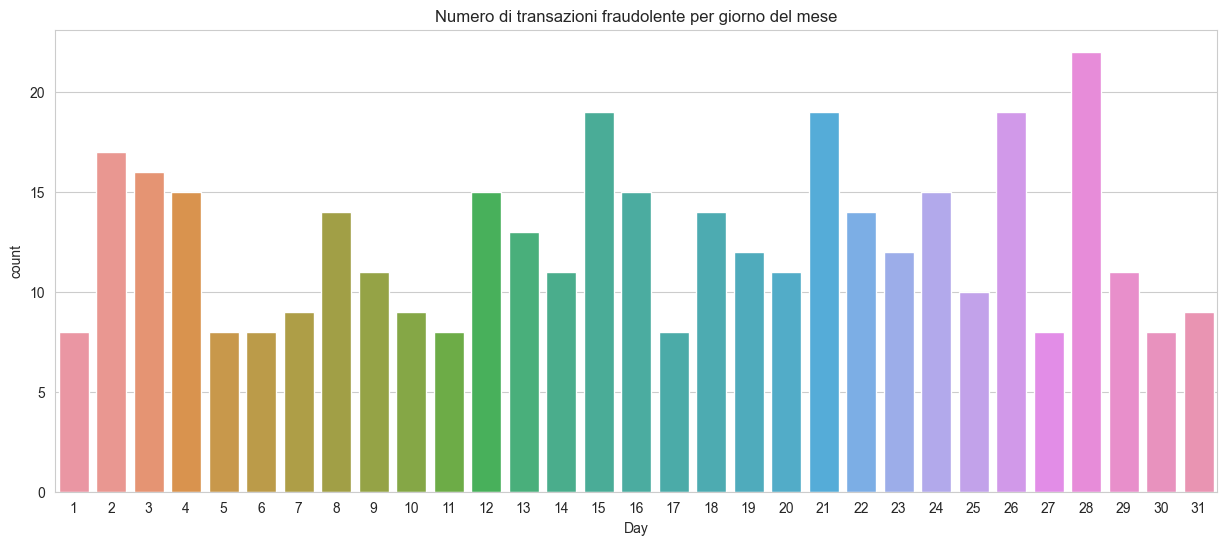

In [19]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_fraud, x='Day')
plt.title('Numero di transazioni fraudolente per giorno del mese')
plt.show()

Anche qui la distribuzione sembra essere abbastanza uniforme.
**Per ora del giorno**
A questo punto, siccome non posso convertire Time in un intero, decido di scomporlo in ora e minuto:

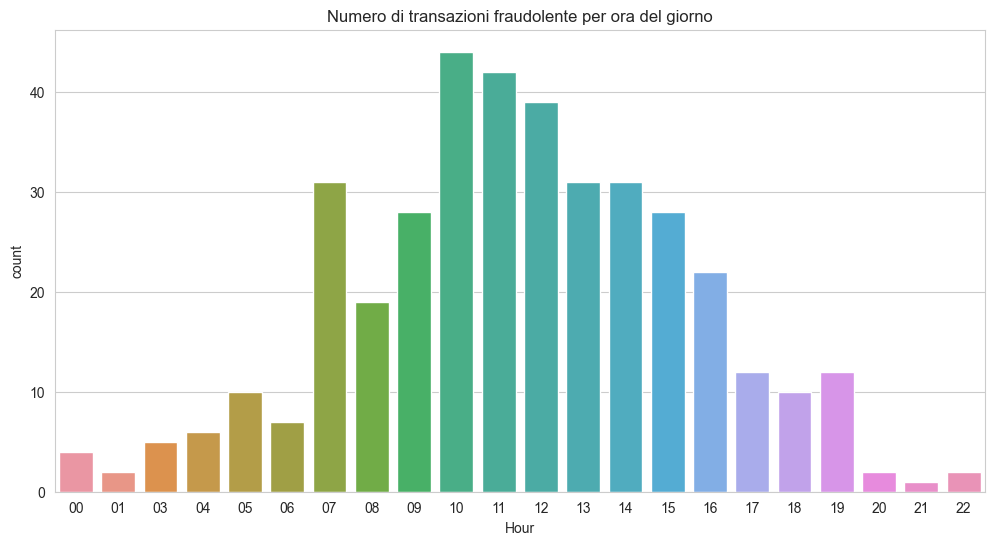

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_fraud, x='Hour', order=sorted(df_fraud['Hour'].unique()))
plt.title('Numero di transazioni fraudolente per ora del giorno')
plt.show()

I picchi si raggiungono tra le 10 e le 12.
### Modalità di pagamento

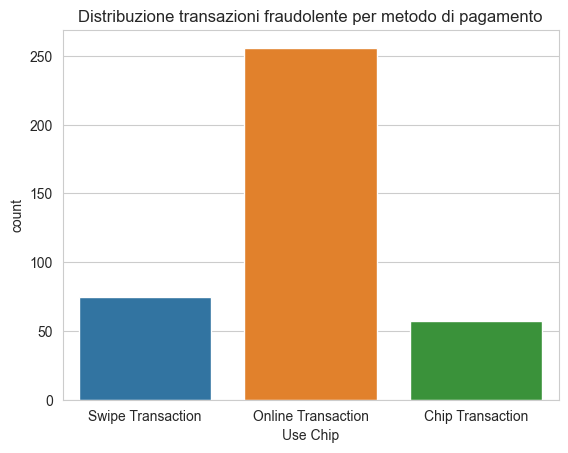

In [21]:
sns.countplot(data=df_fraud, x='Use Chip')
plt.title('Distribuzione transazioni fraudolente per metodo di pagamento')
plt.show()

La maggior parte delle transazioni fraudolente avviene online, come ci si poteva aspettare. Inoltre, le transazioni via chip, che sono, tra tutte, le più sicure, risultano essere, appunto, quelle meno interessate a frodi.

### Tipologia di Errore


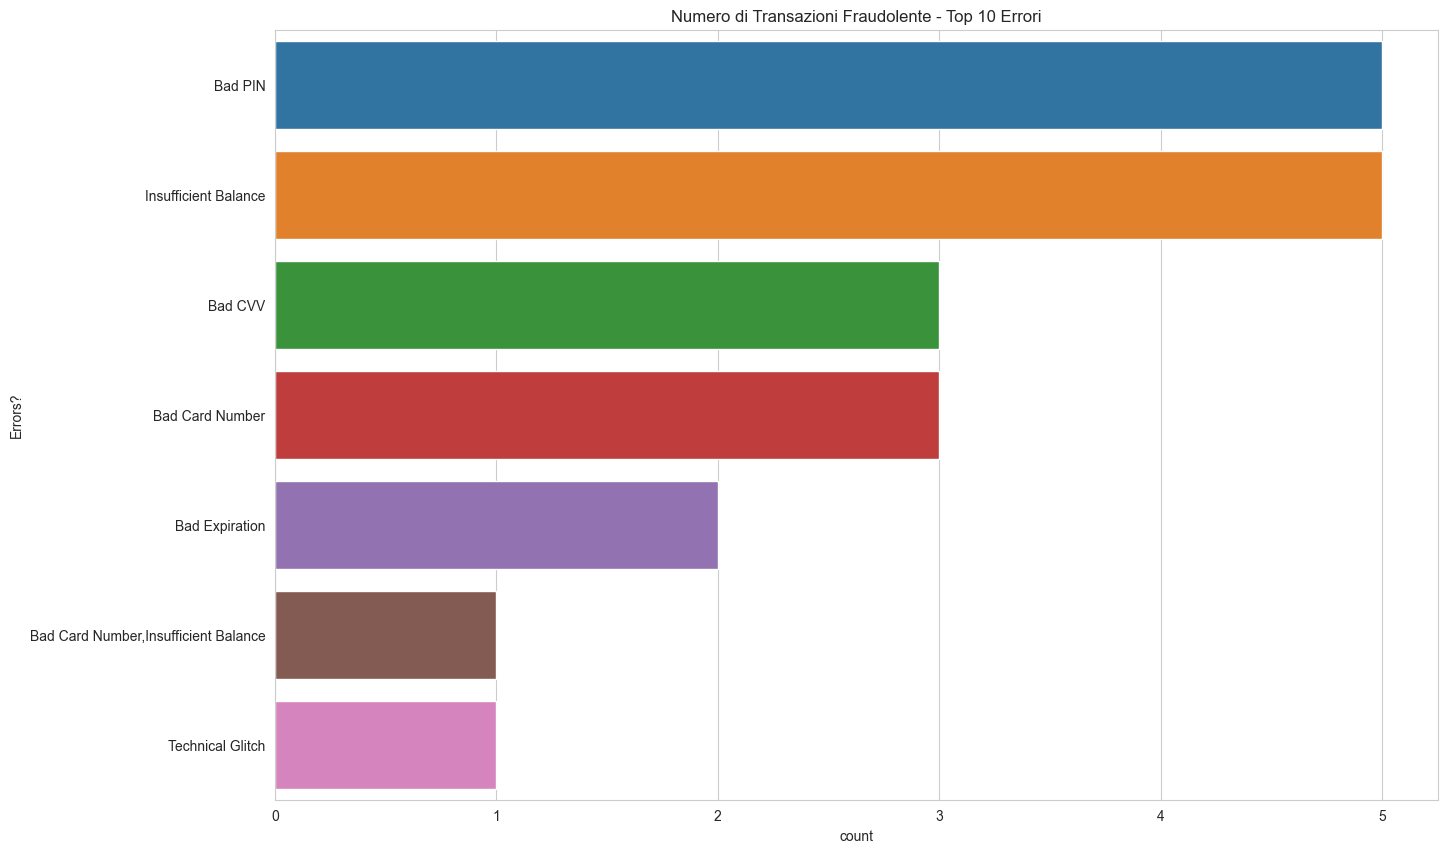

In [22]:
plt.figure(figsize=(15, 10))
top_cities = df_fraud['Errors?'].value_counts().head(10).index
sns.countplot(data=df_fraud, y='Errors?', order=top_cities)
plt.title('Numero di Transazioni Fraudolente - Top 10 Errori')
plt.show()

A quanto pare, gli errori maggiormente correlati alle transazioni fraudolente sono:
- Bad Pin
- Insufficient Balance
- Bad CVV
- Bad Card Number
- Bad Expiration

A questo punto passo a verificare se il dataset è sbilanciato, oppure no.


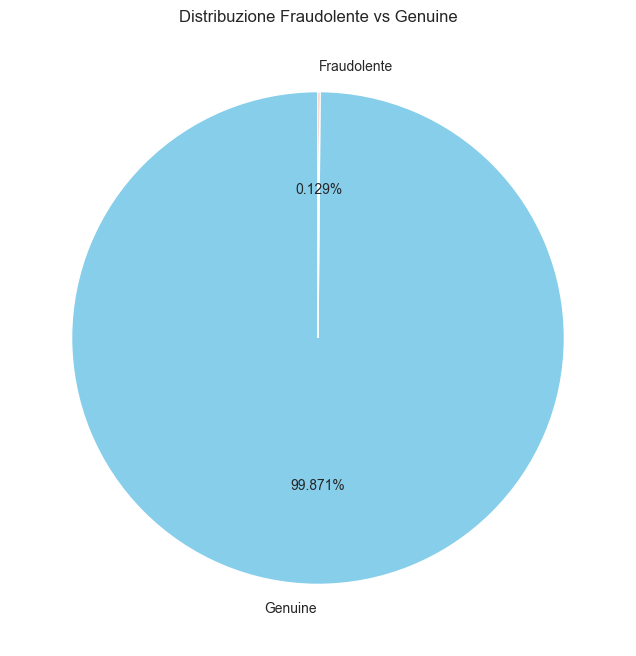

In [23]:
fraud_counts = df['Fraud'].value_counts()

# Crea un grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['Genuine', 'Fraudolente'], autopct=lambda p: '{:.3f}%'.format(p), colors=['skyblue', 'salmon'], startangle=90)
plt.title('Distribuzione Fraudolente vs Genuine')
plt.show()

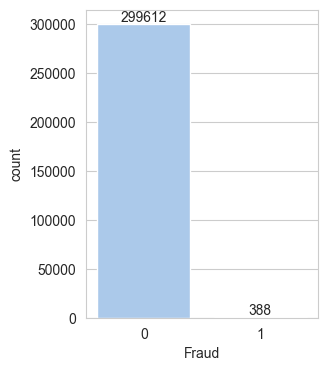

In [24]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Fraud',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Come mostrano i grafici appena riportati, il dataset si mostra estremamente sbilanciato, con solo lo 0,129% delle transazioni che risultano essere fraudolente: 388 casi di frode contro le 299612 transazioni autorizzate.

## Data Preparation
---
### Data Cleaning
A questo punto, sulla base delle osservazioni fatte in fase di Data Understanding, procedo con la pulizia del dataset.

Come osservato sopra, studiando l'output del metodo unique() applicato sulla colonna *Errors?*, questa tabella riporta le varie tipologie di errore verificatesi nelle varie transazioni. Se non si verifca alcun errore, il valore risulta essere nullo. Dunque posso procedere alla sostituzione dei valori nulli con un valore che indica che non si sono verificati errori (imputazione deduttiva). Inoltre, per questioni di leggibilità, vado a rinominare la colonna in *Errors*.

In [25]:
# Imputazione deduttiva dei valori nulli
df['Errors?']= df['Errors?'].fillna("No error")
df['Errors'] = df['Errors?']
df.drop(['Errors?'], axis=1, inplace=True)

# Riporto la variabile target come ultima colonna
target_v = df['Fraud']
df.drop(['Fraud'], axis=1, inplace=True)
df['Fraud'] = target_v
# df.head(10)

In [26]:
# Controllo l'esito dell'operazione
error_null_values = df["Errors"].isnull().sum()
print('Nuovo numero di valori nulli: ', error_null_values)

Nuovo numero di valori nulli:  0


A questo punto vado a rimuovere le colonne *Merchant State* e *Zip* in quanto contengono valori nulli e, ad ogni modo, possono essere ricavate dalla caratteristica *Merchant City*.

In [27]:
df.drop(['Merchant State', 'Zip'], axis=1, inplace=True)

Infine, siccome il modello avrà bisogno di dati numerici, vado a convertire i valori delle features *Merchant City*, *Use Chip*, *Errors* in valori numerici, utilizzando il metodo *LabelEncoder()*, della libreria scikit-learn, che, appunto, converte variabili categoriche in formato numerico, assegnando ad ognuna un intero univoco in ordine di scoperta.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()
df["Merchant City"]=label_encoder.fit_transform(df["Merchant City"])
df["Use Chip"]=label_encoder.fit_transform(df["Use Chip"])
df["Errors"]=label_encoder.fit_transform(df["Errors"])
df.head(10) 

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,MCC,Hour,Minute,Errors,Fraud
18199893,1470,0,2019,7,10,59.18,0,-6853385250336487907,2610,5813,00,11,15,0
9731325,822,1,2019,1,14,280.91,1,4241336128694185533,4502,4814,22,12,15,0
536687,41,3,2010,3,15,-144.00,2,190253443608377572,2671,3359,07,07,15,0
13223840,1084,0,2015,9,20,6.76,0,-7837310524365334241,3493,5300,14,58,15,0
17070521,1384,0,2014,10,12,9.17,2,-5023497618971072366,2253,5812,11,44,15,0
792843,55,3,2006,6,10,1.36,2,-6571010470072147219,5220,5499,09,15,15,0
8966297,776,0,2007,2,25,97.81,2,-6974082828836151610,3976,4900,22,31,15,0
895801,66,0,2007,8,21,23.25,2,3675785629314646441,2370,7349,13,02,15,0
22902727,1880,2,2010,12,31,486.70,2,-3398248499422470718,244,7995,01,06,15,0
5845532,490,5,2015,11,28,92.67,0,4722913068560264812,5001,5411,13,45,15,0


### Feature Scaling
Vado ora ad osservare le distribuzioni dei valori delle varie caratteristiche e le confronto tra loro.

In [30]:
df.describe()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,MCC,Errors,Fraud
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000
mean,999.646807,1.351237,2011.959617,6.523280,15.711017,43.595661,1.375403,-4.918042e+17,3541.174517,5561.354607,14.949873,0.001293
std,570.107840,1.404363,5.095499,3.476527,8.787560,82.174141,0.864460,4.757684e+18,1912.532388,880.968106,0.592285,0.035940
min,0.000000,0.000000,1991.000000,1.000000,1.000000,-500.000000,0.000000,-9.219257e+18,0.000000,1711.000000,0.000000,0.000000
25%,509.000000,0.000000,2008.000000,3.000000,8.000000,9.310000,0.000000,-4.500543e+18,1932.000000,5300.000000,15.000000,0.000000
50%,1005.000000,1.000000,2013.000000,7.000000,16.000000,30.090000,2.000000,-7.948098e+17,3920.000000,5499.000000,15.000000,0.000000
75%,1477.000000,2.000000,2016.000000,10.000000,23.000000,65.000000,2.000000,3.168767e+18,4869.000000,5812.000000,15.000000,0.000000
max,1999.000000,8.000000,2020.000000,12.000000,31.000000,3205.940000,2.000000,9.222877e+18,6973.000000,9402.000000,16.000000,1.000000


Osservo che ci sono più valori molto diversi tra loro, oltre che valori particolarmente grandi,dunque decido di normalizzare tutti i valori nell'intervallo [0, 1] utilizzando uno dei metodi di normalizzazione più comuni: **Min-max normalization**.

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Seleziono tutte le colonne tranne Fraud
norm_features = df.columns.difference(['Fraud'])

# Inizializzo scaler
scaler = MinMaxScaler()

# Eseguo min-max normalization
df[norm_features] = scaler.fit_transform(df[norm_features])

# Controllo il risultato
df.head(10)

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,MCC,Hour,Minute,Errors,Fraud
18199893,0.735368,0.000,0.965517,0.545455,0.300000,0.150887,0.0,0.128286,0.374301,0.533351,0.000000,0.186441,0.9375,0
9731325,0.411206,0.125,0.965517,0.000000,0.433333,0.210718,0.5,0.729883,0.645633,0.403459,0.956522,0.203390,0.9375,0
536687,0.020510,0.375,0.655172,0.181818,0.466667,0.096062,1.0,0.510218,0.383049,0.214276,0.304348,0.118644,0.9375,0
13223840,0.542271,0.000,0.827586,0.727273,0.633333,0.136743,0.0,0.074934,0.500932,0.466649,0.608696,0.983051,0.9375,0
17070521,0.692346,0.000,0.793103,0.818182,0.366667,0.137393,1.0,0.227509,0.323103,0.533221,0.478261,0.745763,0.9375,0
792843,0.027514,0.375,0.517241,0.454545,0.300000,0.135286,1.0,0.143598,0.748602,0.492524,0.391304,0.254237,0.9375,0
8966297,0.388194,0.000,0.551724,0.090909,0.800000,0.161311,1.0,0.121742,0.570199,0.414640,0.956522,0.525424,0.9375,0
895801,0.033017,0.000,0.551724,0.636364,0.666667,0.141192,1.0,0.699216,0.339882,0.733065,0.565217,0.033898,0.9375,0
22902727,0.940470,0.250,0.655172,1.000000,1.000000,0.266248,1.0,0.315636,0.034992,0.817059,0.043478,0.101695,0.9375,0
5845532,0.245123,0.625,0.827586,0.909091,0.900000,0.159924,0.0,0.755995,0.717195,0.481082,0.565217,0.762712,0.9375,0


### Feature Selection
In questa fase vado a ricercare le caratteristiche più rilevanti per la predizione, scartando, infine, quelle con potenza predittiva che non ritengo adeguata e che, se mantenute, potrebbero rendere il futuro modello più impreciso e impattare negativamente le performances. 
In fase di Data Understanding, ho già avuto una prima impressione di quali varibili hanno una forte correlazione con la variabile dipendente. Mi riferisco in particolare all'importo delle transazioni e al metodo di pagamento, ma anche, ad esempio, alla posizione geografica del venditore.
La tecnica che utilizzo in questa fase è nota come **Matrice di Correlazione**. Tale tecnica mostra quanto ogni variabile del dataset è correlata con le altre.


<AxesSubplot: >

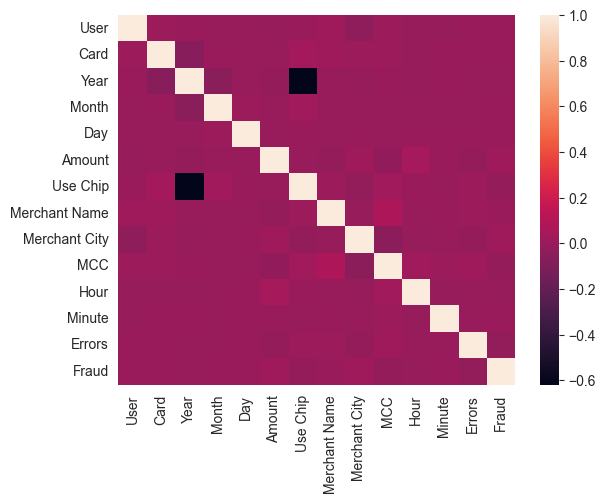

In [33]:
# Visualizzo Matrice di Correlazione
#fig = plt.figure()
sns.heatmap(df.corr(), cbar=True)

Per avere una comprensione migliore, vado a rappresentare solo il grado di relazione di ciascuna feature con la variabile dipendente. 

<AxesSubplot: >

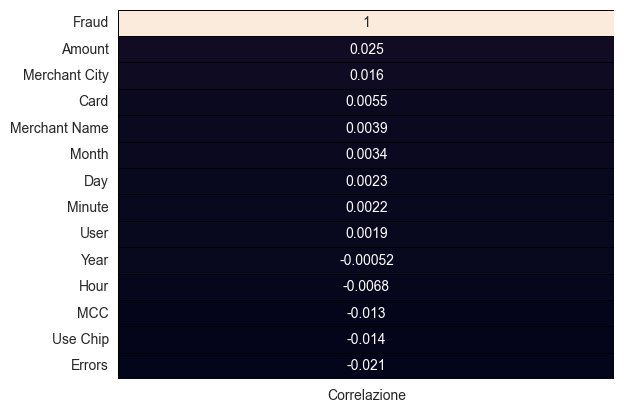

In [34]:
corr = df.corrwith(df['Fraud']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlazione'] # Rinomino la colonna risultante
sns.heatmap(corr, annot = True,linewidths = 0.4,linecolor = 'black',cbar = False)

Osservo che le features che hanno maggiore correlazione con la variabile dipendente sono Amount, Merchant City, MCC, Use Chip ed Errors.
Le restanti variabili, invece, hanno valori molto vicini a zero, il che vuol dire che non sono in relazione con la variabile da predire.
Per tale ragione, queste ultime caratteristiche verranno scartate. Decido, inoltre, di selezionare, sulla base dell'analisi effettuata in fase di esplorazione dei dati, anche la feature Year.

In [35]:
df1 = df[['Amount', 'Merchant City', 'Hour', 'MCC', 'Use Chip', 'Errors', 'Fraud']].copy(deep=True)
df1

,Amount,Merchant City,Hour,MCC,Use Chip,Errors,Fraud
18199893,0.150887,0.374301,0.000000,0.533351,0.0,0.9375,0
9731325,0.210718,0.645633,0.956522,0.403459,0.5,0.9375,0
536687,0.096062,0.383049,0.304348,0.214276,1.0,0.9375,0
13223840,0.136743,0.500932,0.608696,0.466649,0.0,0.9375,0
17070521,0.137393,0.323103,0.478261,0.533221,1.0,0.9375,0
...,...,...,...,...,...,...,...
8197082,0.161236,0.979206,0.608696,0.717592,0.0,0.8125,0
23307708,0.135423,0.753765,0.391304,0.492524,1.0,0.9375,0
3421521,0.136710,0.126344,0.521739,0.481082,0.0,0.9375,0
12718365,0.135032,0.474401,0.391304,0.481082,1.0,0.9375,0


### Data Balancing
Prima di procedere con il sampling, devo separare le features dalla variabile target.
Per la divisione utilizzo la funzione *iloc* di pandas.

In [36]:
# Separo features e target
X = df1.iloc[:,:6].values # Features 
y = df1.iloc[:,6].values # Target

# Controllo risultato split
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (300000, 6)
Shape of y: (300000,)


A questo punto passo a bilanciare il dataset, utilizzando una tecnica chiamata *SMOTE*.

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
print("Prima dell'OverSampling, n. transazioni fraudolente: {}".format(sum(y==1)))
print("Prima dell'OverSampling, n. transazioni non fraudolente: {} \n".format(sum(y==0)))

sm = SMOTE(random_state=52) 
X_smote, y_smote = sm.fit_resample(X, y)

print("Dopo l'OverSampling, n. transazioni fraudolente: {}".format(sum(y_smote==1)))
print("Dopo l'OverSampling, n. transazioni non fraudolente: {}".format(sum(y_smote==0)))

Prima dell'OverSampling, n. transazioni fraudolente: 388
Prima dell'OverSampling, n. transazioni non fraudolente: 299612 

Dopo l'OverSampling, n. transazioni fraudolente: 299612
Dopo l'OverSampling, n. transazioni non fraudolente: 299612


## Data Modeling
---
A questo punto, posso passare all'addestramento del modello. Avendo a che fare con un problema di classificazione binaria, esistono numerosi algoritmi impiegabili.
In particolare, andrò ad utilizzare un algoritmo studiato durante il corso di FIA, cioe' Naive Bayes e un altro algoritmo molto comune: il Random Forest. Infine, verra' scelto quello con le migliori prestazioni. Prima di iniziare, tuttavia, provvedo a separare i dati di training dai dati di test, utilizzando la funzione *train_test_split* e assegnando come dati di test il 20% del totale. Infatti, validare il modello sugli stessi dati con cui è stato addestrato (più in generale, mischiarli) è considerato un errore metodologico poiché puo' portare a risultati totalmente inaffidabili.

In [39]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [40]:
# Divido il dataset
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=52)
print("Numero di transazioni nel dataset X_train: ", X_train.shape)
print("Numero di transazioni nel dataset y_train: ", y_train.shape)
print("Numero di transazioni nel dataset X_test: ", X_test.shape)
print("Numero di transazioni nel dataset y_test: ", y_test.shape)
Counter(y_test)  # Controllo proporzione dei valori 0 e 1 nel test set

Numero di transazioni nel dataset X_train:  (419456, 6)
Numero di transazioni nel dataset y_train:  (419456,)
Numero di transazioni nel dataset X_test:  (179768, 6)
Numero di transazioni nel dataset y_test:  (179768,)


Counter({1: 90049, 0: 89719})

Naive Bayes
Esistono tre varianti di Naive Bayes:
- **Gaussian Naive Bayes**: utilizzato con features continue che seguono distribuzione gaussiana
- **Multinomial Naive Bayes**: utilizzato quando le features rappresentano conteggi o frequenze
- **Bernoulli Naive Bayes**: adatto per dati binari o booleani


In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [42]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Prima di proseguire, creo una funzione per il plotting della ROC-AUC Curve:

In [43]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc_curve(false_positives_r, true_positives_r, classifier_name, roc_auc):
    plt.figure(figsize=(8, 4))
    plt.title(classifier_name, fontsize=12)
    plt.plot(false_positives_r, true_positives_r, 'b-', linewidth=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasso Falsi Positivi', fontsize=12)
    plt.ylabel('Tasso Veri Positivi', fontsize=12)
    plt.legend(loc='lower right')
    #plt.axis([-0.01,1,0,1])


### Naive Bayes - Gaussiano

Accuracy:  0.6290830403631347
Precision:  0.8663698501285508
Recall:  0.30685515663694213


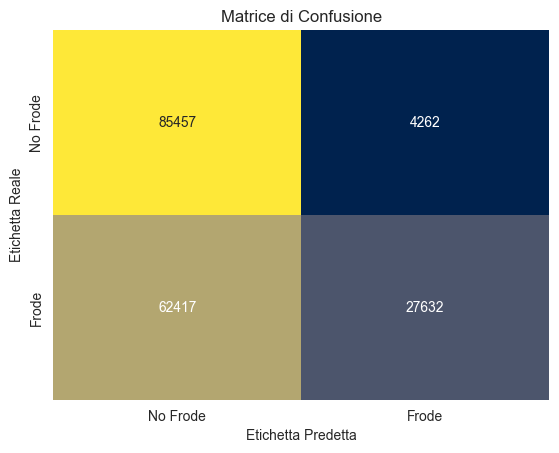

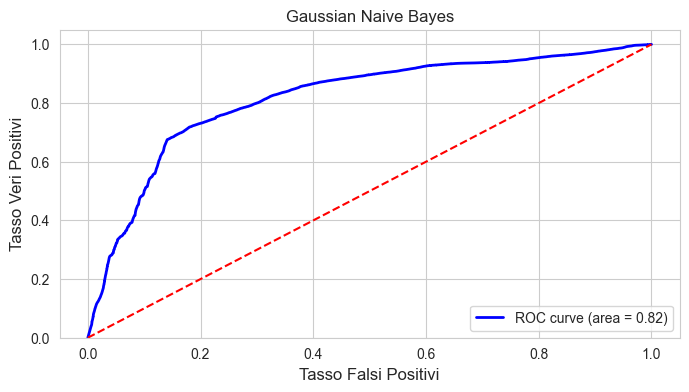

In [44]:
# Addestramento modello
gnb.fit(X_train,y_train)

# Predizione
y_pred_gnb = gnb.predict(X_test)

# Metriche di valutazione
accuracyGNB = accuracy_score(y_test,y_pred_gnb)
precisionGNB = precision_score(y_test,y_pred_gnb)
recallGNB = recall_score(y_test, y_pred_gnb)

print('Accuracy: ', accuracyGNB)
print('Precision: ', precisionGNB)
print('Recall: ' , recallGNB)

# Confusion Matrix
labels = ['No Frode', 'Frode']
confusion_matrix_result = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='cividis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.show()

# ROC-AUC Curve
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb) # Calcolo Area Under the Curve

plot_roc_auc_curve(fpr_gnb, tpr_gnb, 'Gaussian Naive Bayes', roc_auc_gnb)

### Naive Bayes - Bernoulli

Procedo con la variante Bernoulli:

Accuracy:  0.5584531173512527
Precision:  0.537401091931064
Recall:  0.8515141756154982


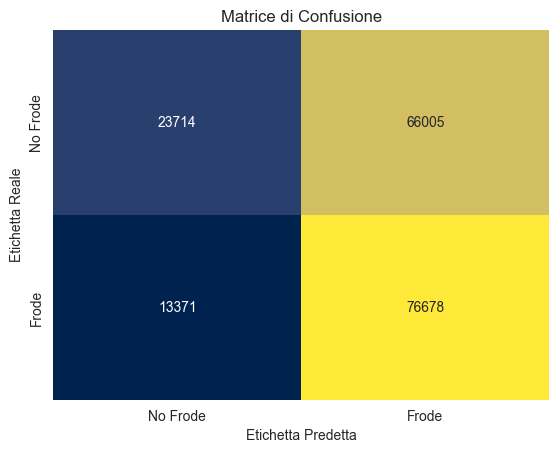

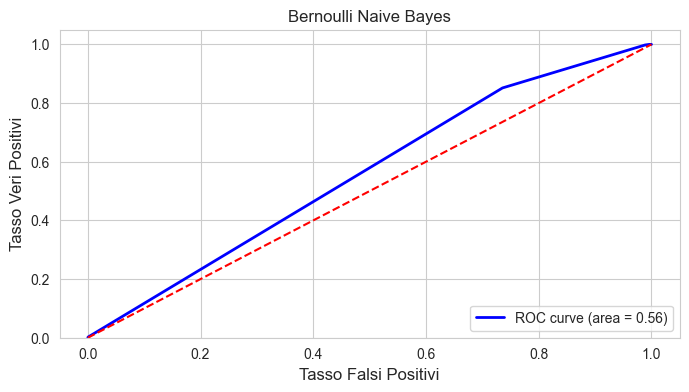

In [45]:
# Addestramento modello
bnb.fit(X_train,y_train)

# Predizione
y_pred_bnb = bnb.predict(X_test) 

accuracyBNB = accuracy_score(y_test,y_pred_bnb)
precisionBNB = precision_score(y_test,y_pred_bnb)
recallBNB = recall_score(y_test,y_pred_bnb)

print('Accuracy: ', accuracyBNB)
print('Precision: ', precisionBNB)
print('Recall: ' , recallBNB)

# Confusion Matrix
labels = ['No Frode', 'Frode']
confusion_matrix_result = confusion_matrix(y_test, y_pred_bnb)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='cividis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.show()

# ROC-AUC Curve
fpr_bnb, tpr_bnb, _ = roc_curve(y_test, bnb.predict_proba(X_test)[:, 1])
roc_auc_bnb = auc(fpr_bnb, tpr_bnb) # Calcolo Area Under the Curve

plot_roc_auc_curve(fpr_bnb, tpr_bnb, 'Bernoulli Naive Bayes', roc_auc_bnb)

### Naive Bayes - Multinomial

Infine, la variante Multinomial:

Accuracy:  0.7094922344354946
Precision:  0.6758173823313408
Recall:  0.8073049117702584


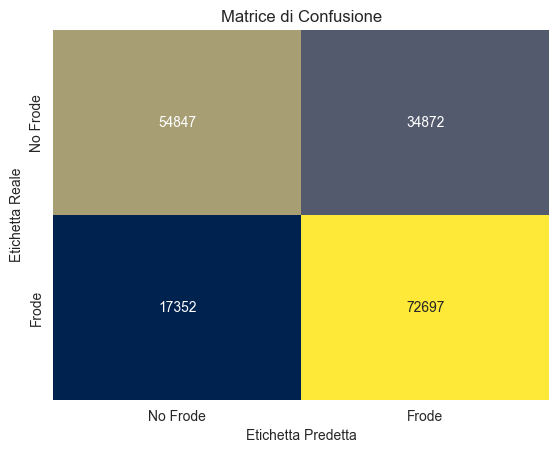

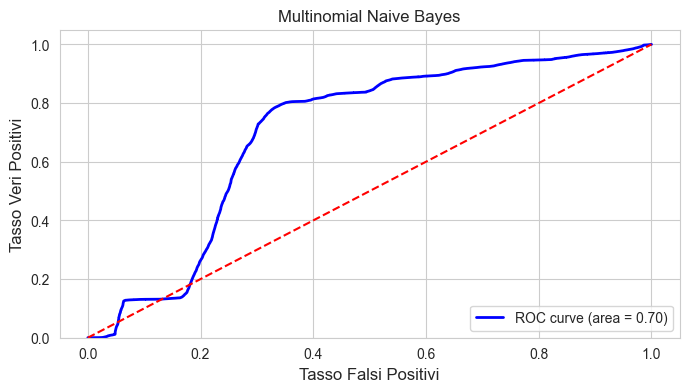

In [46]:
# Addestramento modello
mnb.fit(X_train,y_train)

# Predizione
y_pred_mnb = mnb.predict(X_test) 

accuracyMNB = accuracy_score(y_test,y_pred_mnb)
precisionMNB = precision_score(y_test,y_pred_mnb)
recallMNB = recall_score(y_test,y_pred_mnb)

print('Accuracy: ', accuracyMNB)
print('Precision: ', precisionMNB)
print('Recall: ' , recallMNB)

# Confusion Matrix
labels = ['No Frode', 'Frode']
confusion_matrix_result = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='cividis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.show()

# ROC-AUC Curve
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb.predict_proba(X_test)[:, 1])
roc_auc_mnb = auc(fpr_mnb, tpr_mnb) # Calcolo Area Under the Curve

plot_roc_auc_curve(fpr_mnb, tpr_mnb, 'Multinomial Naive Bayes', roc_auc_mnb)

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Accuracy:  0.9974689599928798
Precision:  0.9968390932079322
Recall:  0.9981121389465736


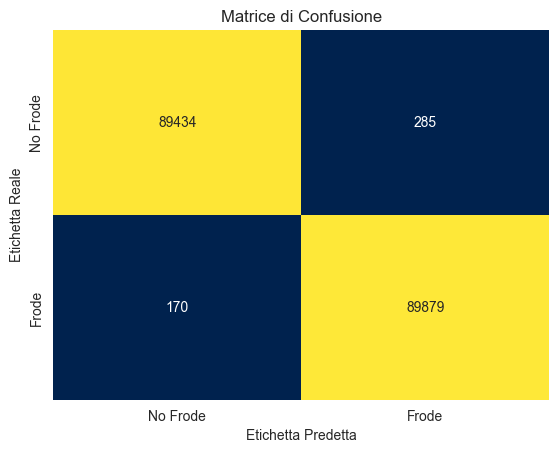

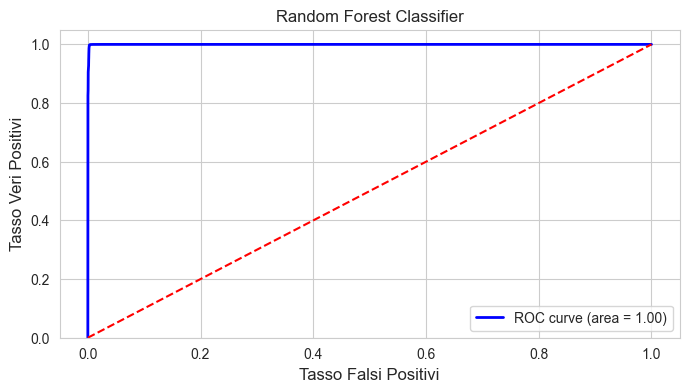

In [48]:
rf = RandomForestClassifier(random_state=84)

# Addestra il modello sul training set
rf.fit(X_train, y_train)

# Effettua previsioni sul test set
y_pred = rf.predict(X_test)

accuracyRF = accuracy_score(y_test,y_pred)
precisionRF = precision_score(y_test,y_pred)
recallRF = recall_score(y_test,y_pred)

print('Accuracy: ', accuracyRF)
print('Precision: ', precisionRF)
print('Recall: ', recallRF)

#print("Classification Report:")
#print(classification_report(y_test, y_pred))

labels = ['No Frode', 'Frode']
confusion_matrix_result = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='cividis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.show()

# ROC-AUC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf) # Calcolo Area Under the Curve

plot_roc_auc_curve(fpr_rf, tpr_rf, 'Random Forest Classifier', roc_auc_rf)

### Confronto
Osservo che i risultati ottenuti dal Random Forest, in termini di Accuracy, Precision e Recall, sono nettamente migliori rispetto ai risultati di una qualsiasi tra le varianti di Naive Bayes implementate. Inoltre, la curva ROC tocca il punto di coordinate (0, 1), che rappresenta il valore ideale. Probabilmente, le scarse prestazioni di Naive Bayes sono dovute dal fatto che, come dice il nome, Naive Bayes è un algoritmo *naive*, cio' ingenuo, che considera tutte le features come indipendenti tra loro.
Di seguito riportata una tabella che riassume il confronto tra i vari algoritmi e che mi ha portato a scegliere il classificatore Random Forest per addestrare il modello.

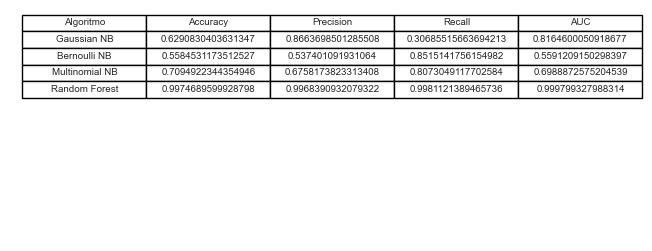

In [49]:
from tabulate import tabulate
# Creo dizionario con metriche di valutazione
data = {
    'Algoritmo': ['Gaussian NB', 'Bernoulli NB', 'Multinomial NB', 'Random Forest'],
    'Accuracy': [accuracyGNB, accuracyBNB, accuracyMNB, accuracyRF],
    'Precision': [precisionGNB, precisionBNB, precisionMNB, precisionRF],
    'Recall': [recallGNB, recallBNB, recallMNB, recallRF],
    'AUC': [roc_auc_gnb, roc_auc_bnb, roc_auc_mnb, roc_auc_rf]
}

# Creo DataFrame
df_comparison = pd.DataFrame(data)

# Creo tabella
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
table = ax.table(cellText=df_comparison.values,
                 colLabels=df_comparison.columns,
                 cellLoc='center',
                 loc='upper left',
                 fontsize=12)

# Stampa la tabella
plt.show()


## Evaluation
---
A questo punto, come analisi conclusiva, posso osservare le caratteristiche che si sono rilevate più rilevanti per la predizione. 

Feature importances:
         Feature  Rilevanza
5         Errors   0.010757
0         Amount   0.103827
4       Use Chip   0.128325
2           Hour   0.140306
3            MCC   0.306273
1  Merchant City   0.310512


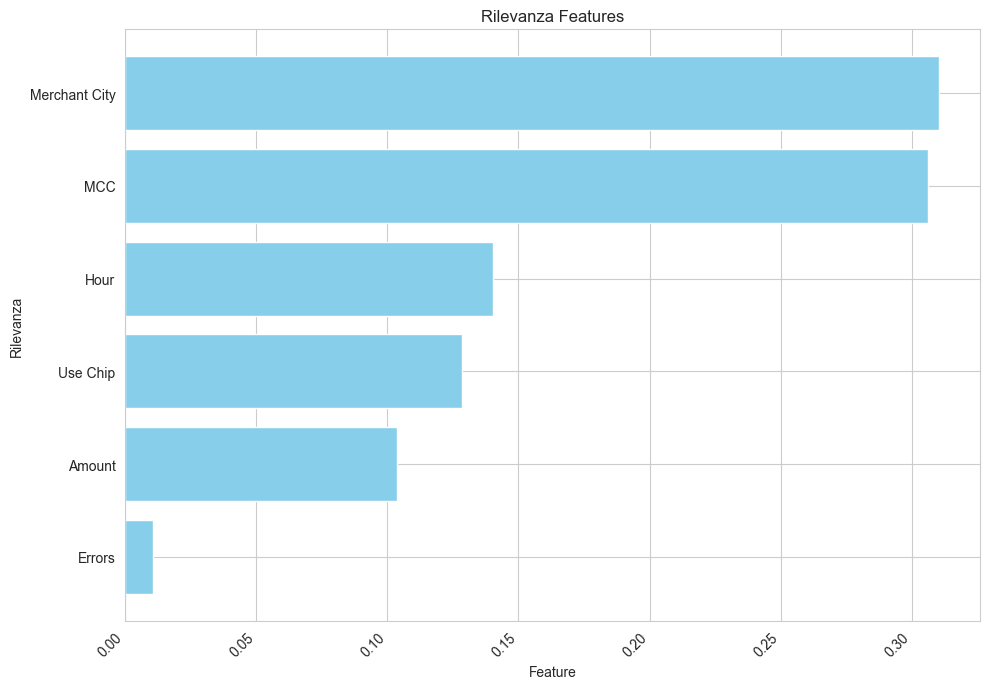

In [50]:
# Analisi Best Features
column_names = ['Amount', 'Merchant City', 'Hour', 'MCC', 'Use Chip', 'Errors']

# Ottieni le importanze delle feature
feature_importances = rf.feature_importances_

# Creare un DataFrame per le feature e le relative importanze
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Rilevanza': feature_importances})

# Ordina il DataFrame in base all'importanza crescente
feature_importance_df = feature_importance_df.sort_values(by='Rilevanza', ascending=True)

# Stampa le feature ordinate per importanza
print("Feature importances:")
print(feature_importance_df)

# Visualizzo le feature più rilevanti in un istogramma
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Rilevanza'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Rilevanza')
plt.title('Rilevanza Features')
plt.xticks(rotation=45, ha='right')  # Ruoto le etichette dell'asse x per una migliore leggibilità
plt.tight_layout()
plt.show()

Le tre features più rilevanti, come riportato in questo grafico, sono:
- Merchant City: come visto in un'analisi iniziale, ci sono aree geografiche maggiormente interessate da frodi relative a pagamenti elettronici.
- MCC: determinate categorie di business, possono essere più soggette a frodi, per varie ragioni.
- Hour: risultano esserci determinate fasce orarie in cui gli scammers sono più attivi.


## Deploy
---
A questo punto non mi resta che esportare il modello per poterlo importare in un'applicazione.

In [51]:
import pickle 

# Per generare nuovamente il modello, basta decommentare
# pickle.dump(rf, open('model.pkl','wb'))

In [52]:
# Salvo anche Min-Max Scaler e LabelEncoder
#with open('label_encoder.pkl', 'wb') as le_file:
    #pickle.dump(label_encoder, le_file)

#with open('scaler.pkl', 'wb') as scaler_file:
    #pickle.dump(scaler, scaler_file)